In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Iteration 0: Loss = 0.6931471805599447
Iteration 100: Loss = 0.5969248590881463
Iteration 200: Loss = 0.5364185009750075
Iteration 300: Loss = 0.49648043555633975
Iteration 400: Loss = 0.468769048072822
Iteration 500: Loss = 0.44869457733212853
Iteration 600: Loss = 0.43362891202047105
Iteration 700: Loss = 0.4219927303658182
Iteration 800: Loss = 0.41279219533738387
Iteration 900: Loss = 0.4053756976036838


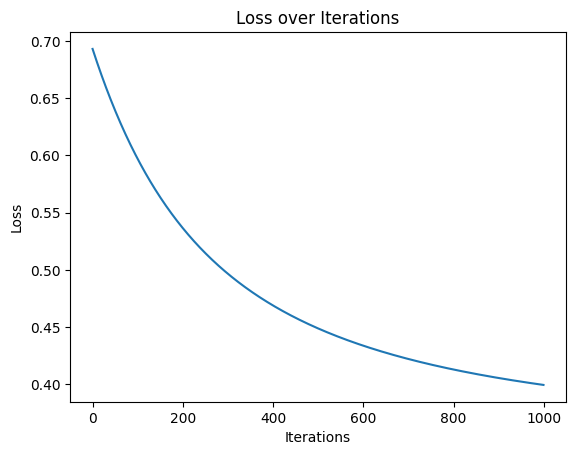

Test Accuracy: 86.33%


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Loss function
def compute_loss(y, y_hat):
    m = y.shape[0]
    loss = -1/m * (np.dot(y, np.log(y_hat)) + np.dot(1-y, np.log(1-y_hat)))
    return loss

# Gradient descent function
def gradient_descent(X, y, learning_rate, iterations):
    m, n = X.shape
    w = np.zeros(n)
    b = 0
    losses = []

    for i in range(iterations):
        # Compute the model's predictions
        z = np.dot(X, w) + b
        y_hat = sigmoid(z)

        # Compute the gradients
        dw = 1/m * np.dot(X.T, (y_hat - y))
        db = 1/m * np.sum(y_hat - y)

        # Update the parameters
        w -= learning_rate * dw
        b -= learning_rate * db

        # Compute the loss
        loss = compute_loss(y, y_hat)
        losses.append(loss)

        if i % 100 == 0:
            print(f"Iteration {i}: Loss = {loss}")

    return w, b, losses

# Predict function
def predict(X, w, b):
    z = np.dot(X, w) + b
    y_hat = sigmoid(z)
    return y_hat >= 0.5

# Load the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/agratas/The_Cancer_data_1500_V2.csv'
data = pd.read_csv(file_path)

# Assuming the last column is the label and the first 7 columns are features
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Optionally normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
learning_rate = 0.01
iterations = 1000
w, b, losses = gradient_descent(X_train, y_train, learning_rate, iterations)

# Plot the loss over iterations
plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()

# Make predictions on the test set
predictions = predict(X_test, w, b)
accuracy = np.mean(predictions == y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


In [5]:
# Function to test new data
def test_new_data(new_data, scaler, w, b):
    # Preprocess the new data (assuming it's a single example)
    new_data = scaler.transform([new_data])
    prediction = predict(new_data, w, b)
    return prediction[0]

# Example of testing new data
new_data = [2.5, 3.1, 1.2, 4.5, 0.8, 1.5, 3.2,0]  # Example new data point with 7 features
is_cancer = test_new_data(new_data, scaler, w, b)
print(f"Does the patient have cancer? {'Yes' if is_cancer else 'No'}")

Does the patient have cancer? Yes
